In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from math import sin, cos, sqrt, atan2
df = pd.read_csv("../../api/bird_unofficial_api/csv_output.csv")

In [2]:
# Preprocessing and adding date columns
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
df['datetime'] = df['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))
df['date_string'] = df['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['week_day'] = df['datetime'].apply(lambda x: days[x.weekday()])
df['coordinates']= pd.Series(list(zip(df.latitude, df.longitude)))

In [3]:
df.head()

,id,latitude,longitude,battery_level,captive,time_stamp,datetime,date_string,week_day,coordinates
0,efdcb512-0f67-4f87-91b0-22799c2bf265,34.413010,-119.855355,58,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu,"(34.41301, -119.855355)"
1,7c2a13b6-3665-4f48-a974-7da3027b1c10,34.413360,-119.856087,49,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu,"(34.41336, -119.85608666666668)"
2,14552811-dc78-470d-8268-5427383ded9e,34.413730,-119.856170,37,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu,"(34.41373, -119.85617)"
3,b1e03b0f-a1e0-4801-9096-7dcbba49ed64,34.411740,-119.854775,56,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu,"(34.41174, -119.854775)"
4,f7fac8a3-b5d8-4421-ada2-c58990525a80,34.413167,-119.857628,69,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu,"(34.41316666666667, -119.85762833333335)"


In [4]:
df['date_string'].unique()

array(['2019-02-21', '2019-02-25', '2019-02-06', '2019-02-26',
       '2019-02-14', '2019-02-13', '2019-02-28', '2019-02-08',
       '2019-02-22', '2019-02-03', '2019-02-15', '2019-02-05',
       '2019-02-24', '2019-02-16', '2019-02-19', '2019-02-09',
       '2019-02-04', '2019-02-10', '2019-02-20', '2019-02-18',
       '2019-02-12', '2019-02-01', '2019-02-27', '2019-02-23',
       '2019-01-27', '2019-02-17', '2019-01-25', '2019-02-07',
       '2019-01-28', '2019-02-11', '2019-01-24', '2019-03-01'],
      dtype=object)

In [5]:
# Euclidean distance calculation (only roughly accurate for 10 min interval polling)
# start and end are tuples of (lat, long)
def distance(start, end):
    R = 6373.0
    dlon = end[1] - start[1]
    dlat = end[0] - start[0]
    a = (sin(dlat/2))**2 + cos(start[0]) * cos(end[0]) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance*1000 #km -> meters

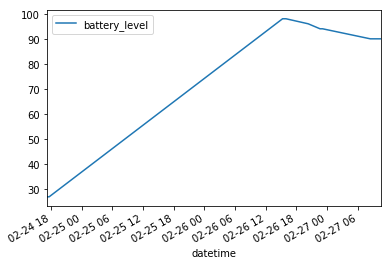

In [6]:
unique_ids = pd.Series(df['id'].values).unique().tolist()
id_df = df[df['id'] == unique_ids[200]]
id_df.plot(x='datetime', y='battery_level')


dict_keys([Timestamp('2019-02-08 07:10:00', freq='10T'), Timestamp('2019-02-08 07:20:00', freq='10T'), Timestamp('2019-02-08 07:30:00', freq='10T'), Timestamp('2019-02-08 07:40:00', freq='10T'), Timestamp('2019-02-08 07:50:00', freq='10T'), Timestamp('2019-02-08 08:00:00', freq='10T'), Timestamp('2019-02-08 08:10:00', freq='10T'), Timestamp('2019-02-08 08:20:00', freq='10T'), Timestamp('2019-02-08 08:30:00', freq='10T'), Timestamp('2019-02-08 08:40:00', freq='10T'), Timestamp('2019-02-08 08:50:00', freq='10T'), Timestamp('2019-02-08 09:00:00', freq='10T'), Timestamp('2019-02-08 09:10:00', freq='10T'), Timestamp('2019-02-08 09:20:00', freq='10T'), Timestamp('2019-02-08 09:30:00', freq='10T'), Timestamp('2019-02-08 09:40:00', freq='10T'), Timestamp('2019-02-08 09:50:00', freq='10T'), Timestamp('2019-02-08 10:00:00', freq='10T'), Timestamp('2019-02-08 10:10:00', freq='10T'), Timestamp('2019-02-08 10:20:00', freq='10T'), Timestamp('2019-02-08 10:30:00', freq='10T'), Timestamp('2019-02-08 1

KeyError: Timestamp('2019-02-08 07:20:00', freq='10T')

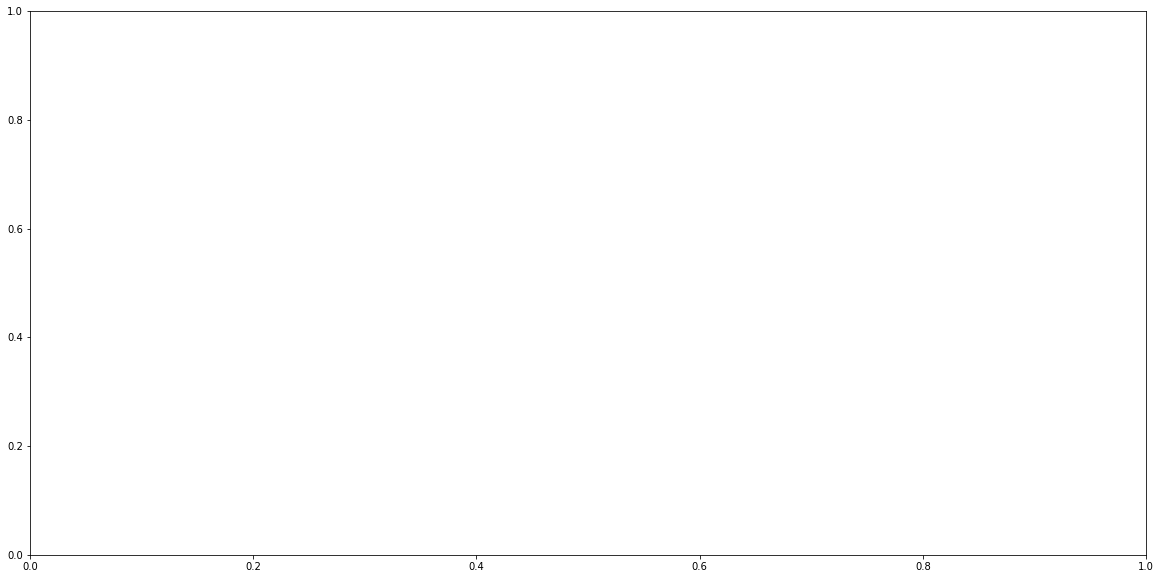

In [21]:
day_df = df[df['date_string'] == '2019-02-08']
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level']
# count_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
# ax = count_df.plot(figsize=(20,10), label = 'count')
key_list = []
item_list = []
# ax1 = ax.twinx()
fig, ax = plt.subplots(figsize=(20, 10))
counter = 0
print(freq_df.groups.keys())
for key in freq_df.groups.keys():
    key_list.append(key)
    print(key)
    item_list.append(freq_df.get_group(key))
#     ax1.boxplot(freq_df.get_group(key), notch=0, sym='+', vert=1, whis=1.5)
    counter +=1
ax.boxplot(item_list)
ax.set_xticklabels(key_list)
print(counter)

# day_df.boxplot('battery_level')

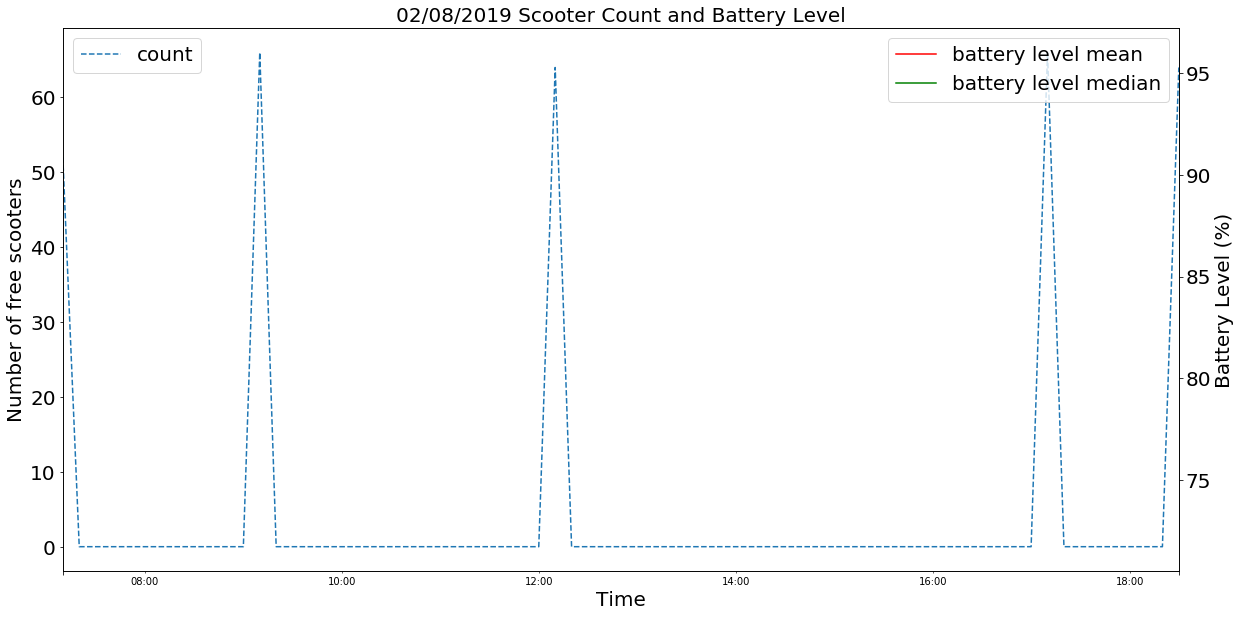

In [22]:
# Returns the large plot of battery and count for the powerpoint
day_df = df[df['date_string'] == '2019-02-08']
fontsize = '20'
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
ax = freq_df.plot(figsize=(20,10), label = 'count', ls='dashed')
ax1 = ax.twinx()
ax.set_title("02/08/2019 Scooter Count and Battery Level", fontsize = fontsize)
ax.set_xlabel("Time", fontsize = fontsize)
ax.legend(loc = 2, fontsize = fontsize)
ax.set_ylabel("Number of free scooters", fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
ax1.set_ylabel("Battery Level (%)", fontsize = fontsize)
ax1.tick_params(axis = 'both', labelsize = fontsize)
bat_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].mean()
bat_df_q1 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.25)
bat_df_q2 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].median()
bat_df_q3 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.75)
bat_df.plot(figsize=(20,10), ax=ax1, color= 'red', label = 'battery level mean')
# bat_df_q1.plot(figsize = (20,10), ax=ax1, color= 'blue', label = 'battery level Quartile 1')
bat_df_q2.plot(figsize = (20,10), ax=ax1, color= 'green', label = 'battery level median')
# bat_df_q3.plot(figsize = (20,10), ax=ax1, color= 'purple', label = 'battery level Quartile 3')
# ax1.set_ylim(bottom=0)
# ax.set_ylim(bottom=0)

ax1.legend(fontsize = fontsize)

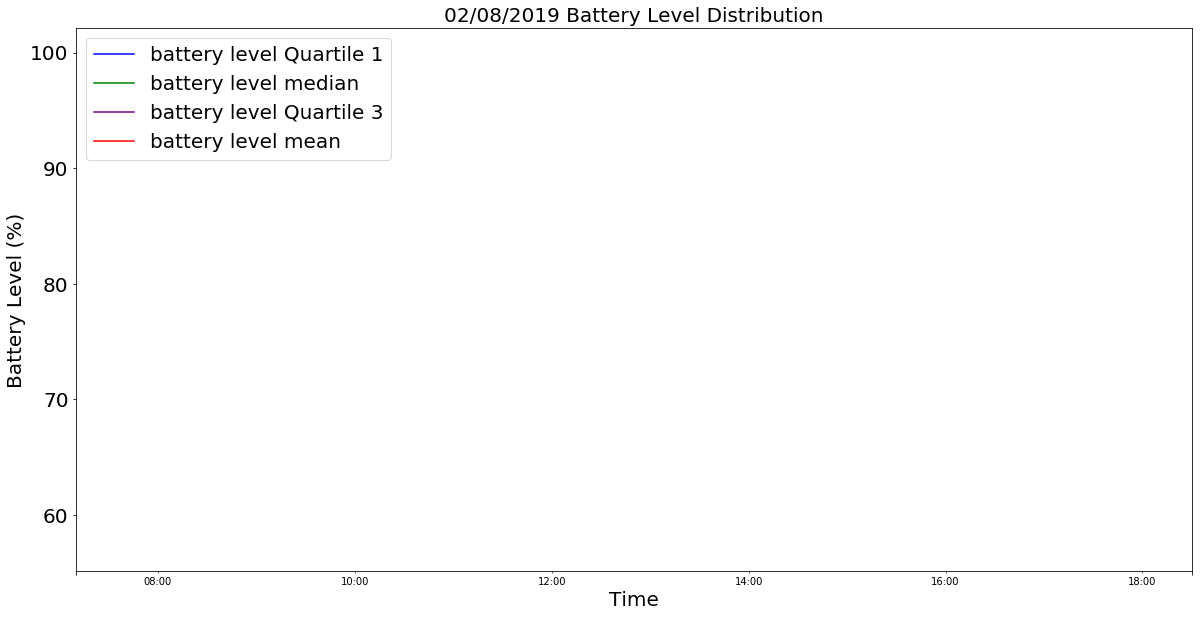

In [13]:
# Returns the large plot of battery and count for the powerpoint
day_df = df[df['date_string'] == '2019-02-08']
fontsize = '20'
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
# ax = freq_df.plot(figsize=(20,10), label = 'count', ls='dashed')
# ax1 = ax.twinx()

bat_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].mean()
bat_df_q1 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.25)
bat_df_q2 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].median()
bat_df_q3 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.75)
bat_df.plot(figsize=(20,10), ax=ax, color= 'red', label = 'battery level mean')
ax = bat_df_q1.plot(figsize = (20,10), color= 'blue', label = 'battery level Quartile 1')
bat_df_q2.plot(figsize = (20,10), ax=ax, color= 'green', label = 'battery level median')
bat_df_q3.plot(figsize = (20,10), ax=ax, color= 'purple', label = 'battery level Quartile 3')
bat_df.plot(figsize=(20,10), ax=ax, color= 'red', label = 'battery level mean')
ax.set_title("02/08/2019 Battery Level Distribution", fontsize = fontsize)
ax.set_xlabel("Time", fontsize = fontsize)
ax.legend(loc = 2, fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
ax.set_ylabel("Battery Level (%)", fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
# ax1.set_ylim(bottom=0)

# ax.set_ylim(bottom=0)

ax1.legend(fontsize = fontsize)